[View in Colaboratory](https://colab.research.google.com/github/sungreong/GAN/blob/master/Keras_GAN_Model_save_and_load.ipynb)

## 참고자료 :  https://github.com/sungreong/Repo-2017

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import objectives
from keras.datasets import mnist
from keras.layers.core import Reshape
from __future__ import print_function
import numpy as np
np.random.seed(1337)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, UpSampling2D
from keras.utils import np_utils
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import os
os.environ["KERAS_BACKEND"] = "theano"
#os.environ["THEANO_FLAGS"]  = "device=gpu%d,lib.cnmem=0"%(random.randint(0,3))



In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_train=x_train[1:2]
x_test=x_test[1:2]
y_train=y_train[1:2]
y_test=y_test[1:2]

batch_size = 10
nb_classes = 10
nb_epoch = 1

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows,img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')[1:2]
X_test = X_test.astype('float32')[1:2]
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')



X_train shape: (1, 28, 28, 1)
1 train samples
1 test samples


In [0]:
sd=[]

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = [1,1]

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        sd.append(step_decay(len(self.losses)))
        print('learning rate:', step_decay(len(self.losses)))
        print('derivative of loss:', 2*np.sqrt((self.losses[-1])))

def my_init(shape, name=None):
    value = np.random.random(shape)
    return K.variable(value, name=name)

def step_decay(losses):
    if float(2*np.sqrt(np.array(history.losses[-1])))<1.6:
        lrate=0.006
        momentum=0.4
        decay_rate=0.0
        return lrate
    else:
        lrate=0.01
        return lrate






In [34]:
generator = Sequential()
generator.add(Convolution2D(20, 3,3,
                        border_mode='valid',
                        input_shape=input_shape))

generator.add(BatchNormalization())
generator.add(Activation('relu'))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Convolution2D(20, 3, 3,
                            init='glorot_uniform'))
generator.add(BatchNormalization())
generator.add(Activation('relu'))
generator.add(Convolution2D(20, 3, 3,init='glorot_uniform'))
generator.add(BatchNormalization())
generator.add(Activation('relu'))
generator.add(MaxPooling2D(pool_size=(3,3)))
generator.add(Convolution2D(4, 3, 3,init='glorot_uniform'))
generator.add(BatchNormalization())
generator.add(Activation('relu'))
generator.add(Reshape((28,28,1)))
generator.compile(loss='binary_crossentropy', optimizer='adam')
generator.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), kernel_initializer="glorot_uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), kernel_initializer="glorot_uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), kernel_initializer="glorot_uniform")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 20)        200       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 20)        80        
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 20)        0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 52, 52, 20)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 20)        3620      
_________________________________________________________________
batch_normalization_6 (Batch (None, 50, 50, 20)        80        
_________________________________________________________________
activation_10 (Activation)   (None, 50, 50, 20)        0         
__________

In [36]:
############# DISCRIMINATOR

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows,img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')[1:2]
X_test = X_test.astype('float32')[1:2]
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)[1:2]
Y_test = np_utils.to_categorical(y_test, nb_classes)[1:2]

history=LossHistory()
print("history : " , history)
lrate=LearningRateScheduler(step_decay)
print("lrate : " ,lrate)

discriminator = Sequential()
discriminator.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))

discriminator.add(Activation('relu'))
discriminator.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
discriminator.add(Activation('relu'))
discriminator.add(MaxPooling2D(pool_size=pool_size))
discriminator.add(Dropout(0.25))
discriminator.add(Flatten())
discriminator.add(Dense(64))
discriminator.add(Activation('relu'))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(nb_classes))
discriminator.add(Activation('sigmoid'))

discriminator.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

discriminator.summary()


X_train shape: (1, 28, 28, 1)
1 train samples
1 test samples
history :  <__main__.LossHistory object at 0x7ff1d5a30ba8>
lrate :  <keras.callbacks.LearningRateScheduler object at 0x7ff1d5b5aa90>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_17 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_18 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_5 (Dro

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`


In [41]:
filepath="CNN_MNIST-{loss:.4f}.hdf5"
checkpoint_discr = ModelCheckpoint(filepath, monitor='binary_crossentropy', verbose=1, save_best_only=True)
# batch_size = 12 

discriminator.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=12 ,callbacks=[history,lrate,checkpoint_discr],
          verbose=1, validation_data=(X_test, Y_test))

score = discriminator.evaluate(X_test, Y_test, verbose=2)
print("="*100)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 1 samples, validate on 1 samples
Epoch 1/12
1/1 [==============================] - 0s 18ms/step - loss: 2.3374 - acc: 0.0000e+00 - val_loss: 2.3034 - val_acc: 0.0000e+00
learning rate: 0.01
derivative of loss: 3.057734148194168
Epoch 2/12
1/1 [==============================] - 0s 15ms/step - loss: 2.1816 - acc: 1.0000 - val_loss: 2.3033 - val_acc: 0.0000e+00
learning rate: 0.01
derivative of loss: 2.9540353814900753
Epoch 3/12
1/1 [==============================] - 0s 14ms/step - loss: 2.2664 - acc: 0.0000e+00 - val_loss: 2.3031 - val_acc: 0.0000e+00
learning rate: 0.01
derivative of loss: 3.010900878683542
Epoch 4/12
1/1 [==============================] - 0s 16ms/step - loss: 2.1950 - acc: 0.0000e+00 - val_loss: 2.3033 - val_acc: 0.0000e+00
learning rate: 0.01
derivative of loss: 2.9630824550623034
Epoch 5/12
1/1 [==============================] - 0s 13ms/step - loss: 2.2334 - acc: 0.0000e+00 - val_loss: 2.3032 - val_acc: 0.0000e+00
learning rate: 0.01
derivative of loss: 2.9

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:975: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:435: RuntimeWarning: Can save best model only with binary_crossentropy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


learning rate: 0.01
derivative of loss: 2.962145234446416
Epoch 11/12
1/1 [==============================] - 0s 24ms/step - loss: 2.2909 - acc: 0.0000e+00 - val_loss: 2.3032 - val_acc: 0.0000e+00
learning rate: 0.01
derivative of loss: 3.0271145641573747
Epoch 12/12
1/1 [==============================] - 0s 19ms/step - loss: 2.2264 - acc: 0.0000e+00 - val_loss: 2.3030 - val_acc: 0.0000e+00
learning rate: 0.01
derivative of loss: 2.9842526076219875
Test score: 2.303018569946289
Test accuracy: 0.0


In [0]:
def not_train(net, val):
    net.trainable = val
    for k in net.layers:
       k.trainable = val

not_train(discriminator, False)




In [43]:
gan_input = Input(batch_shape=(1, 28,28,1))

generator.summary()
discriminator.summary()

gan_level2 = discriminator(generator(gan_input))

GAN = Model(gan_input, gan_level2)
GAN.compile(loss='categorical_crossentropy', optimizer='adam')

filepath="CNN_STACKED-{loss:.4f}.hdf5"
checkpoint_stacked = ModelCheckpoint(filepath, monitor='binary_crossentropy', verbose=1, save_best_only=False)

GAN.fit(x_train.reshape((1,28,28,1)), Y_train.reshape((1,10)), batch_size=batch_size, nb_epoch=10,
          verbose=1,callbacks=[history,lrate,checkpoint_stacked])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 20)        200       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 20)        80        
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 20)        0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 52, 52, 20)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 20)        3620      
_________________________________________________________________
batch_normalization_6 (Batch (None, 50, 50, 20)        80        
_________________________________________________________________
activation_10 (Activation)   (None, 50, 50, 20)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 2.1140
learning rate: 0.01
derivative of loss: 2.9079148640927444

Epoch 00001: saving model to CNN_STACKED-2.1140.hdf5
Epoch 2/10
1/1 [==============================] - 0s 36ms/step - loss: 2.1142
learning rate: 0.01
derivative of loss: 2.9080378457903238

Epoch 00002: saving model to CNN_STACKED-2.1142.hdf5
Epoch 3/10
1/1 [==============================] - 0s 42ms/step - loss: 2.0675
learning rate: 0.01
derivative of loss: 2.875778424573286

Epoch 00003: saving model to CNN_STACKED-2.0675.hdf5
Epoch 4/10
1/1 [==============================] - 0s 35ms/step - loss: 1.9882
learning rate: 0.01
derivative of loss: 2.820038335688399

Epoch 00004: saving model to CNN_STACKED-1.9882.hdf5
Epoch 5/10
1/1 [==============================] - 0s 35ms/step - loss: 2.0228
learning rate: 0.01
derivative of loss: 2.844535467641837

Epoch 00005: saving model to CNN_STACKED-2.0228.hdf5
Epoch 6/10
1/1 [==============================] - 

In [44]:
!ls

CNN_STACKED-1.9609.hdf5  CNN_STACKED-2.1278.hdf5  CNN_STACKED-2.2958.hdf5
CNN_STACKED-1.9676.hdf5  CNN_STACKED-2.1384.hdf5  CNN_STACKED-2.3046.hdf5
CNN_STACKED-1.9882.hdf5  CNN_STACKED-2.1445.hdf5  CNN_STACKED-2.3086.hdf5
CNN_STACKED-2.0228.hdf5  CNN_STACKED-2.1547.hdf5  CNN_STACKED-2.3554.hdf5
CNN_STACKED-2.0280.hdf5  CNN_STACKED-2.1947.hdf5  CNN_STACKED-2.3712.hdf5
CNN_STACKED-2.0435.hdf5  CNN_STACKED-2.2110.hdf5  CNN_STACKED-2.3749.hdf5
CNN_STACKED-2.0445.hdf5  CNN_STACKED-2.2396.hdf5  CNN_STACKED-2.3836.hdf5
CNN_STACKED-2.0632.hdf5  CNN_STACKED-2.2435.hdf5  CNN_STACKED-2.4385.hdf5
CNN_STACKED-2.0675.hdf5  CNN_STACKED-2.2547.hdf5  CNN_STACKED-2.4585.hdf5
CNN_STACKED-2.1121.hdf5  CNN_STACKED-2.2759.hdf5  CNN_STACKED-2.4736.hdf5
CNN_STACKED-2.1140.hdf5  CNN_STACKED-2.2808.hdf5  datalab
CNN_STACKED-2.1142.hdf5  CNN_STACKED-2.2902.hdf5  mnist-cnn-best.hdf5


0.60140187
max :  [8]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (1, 28, 28, 1)            0         
_________________________________________________________________
sequential_5 (Sequential)    multiple                  8420      
_________________________________________________________________
sequential_7 (Sequential)    multiple                  305194    
Total params: 313,614
Trainable params: 8,292
Non-trainable params: 305,322
_________________________________________________________________


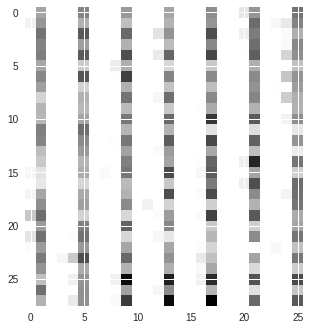

In [54]:

filename = "CNN_STACKED-1.9609.hdf5"

GAN.load_weights(filename)
GAN.compile(loss='binary_crossentropy', optimizer='adam')

bb=GAN.predict(x_test.reshape((1,28,28,1)))
print(np.max(bb))
c=np.where(bb[0]==np.max(bb))[0]
print("max : ",c)
print(Y_train[0])
print(Y_train[0][c])
Y_train[0][c]

### YESSSS
noise = np.random.uniform(0,1,size=[1,784]).reshape((1,28,28,1))
generated_images = generator.predict(noise)
plt.imshow(generated_images.reshape((28,28)),cmap='Greys')




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (1, 28, 28, 1)            0         
_________________________________________________________________
sequential_5 (Sequential)    multiple                  8420      
_________________________________________________________________
sequential_7 (Sequential)    multiple                  305194    
Total params: 313,614
Trainable params: 8,292
Non-trainable params: 305,322
_________________________________________________________________


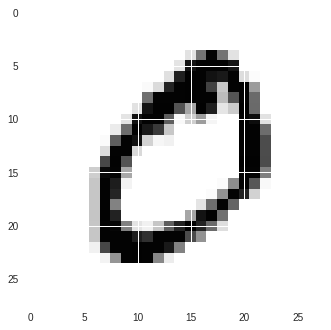

In [55]:
plt.imshow(X_train.reshape((28,28)),cmap='Greys')

GAN.get_config()

GAN.summary()

GAN.get_weights()

from __future__ import print_function

import h5py


In [56]:
def print_structure(weight_file_path):
    f = h5py.File(weight_file_path)
    try:
        if len(f.attrs.items()):
            print("{} contains: ".format(weight_file_path))
            print("Root attributes:")
        for key, value in f.attrs.items():
            print("  {}: {}".format(key, value))

        if len(f.items())==0:
            return 

        for layer, g in f.items():
            print("  {}".format(layer))
            print("    Attributes:")
            for key, value in g.attrs.items():
                print("      {}: {}".format(key, value))

            print("    Dataset:")
            for p_name in g.keys():
                param = g[p_name]

                
                print("      {}: {}".format(p_name, param))
    finally:
        f.close()
        
        
print_structure('CNN_STACKED-2.2396.hdf5')

CNN_STACKED-2.2396.hdf5 contains: 
Root attributes:
  keras_version: b'2.1.6'
  backend: b'tensorflow'
  model_config: b'{"class_name": "Model", "config": {"name": "model_3", "layers": [{"name": "input_3", "class_name": "InputLayer", "config": {"batch_input_shape": [1, 28, 28, 1], "dtype": "float32", "sparse": false, "name": "input_3"}, "inbound_nodes": []}, {"name": "sequential_3", "class_name": "Sequential", "config": [{"class_name": "Conv2D", "config": {"name": "conv2d_3", "trainable": true, "batch_input_shape": [null, 28, 28, 1], "dtype": "float32", "filters": 20, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activit